### Customer Segmentation

### Prep

In [1]:
import pandas as pd
import numpy as np
import scipy as sc
import seaborn as sns
import matplotlib.pyplot as plt

Import dataset

In [2]:
df = pd.read_parquet('df.parquet')

In [3]:
df.fillna(value='None', inplace=True)

### EDA

In [4]:
df.head()

,orderID,orderDate,clienteID,CEP,estado,bairro,cidade,rua,numero,endereco,gender,age,plataform,total,products,cupon
0,1,24/11/2022 19:03,b23d4264-b084-4b5f-b341-fb1775b0a2f9,81650130,PR,Boqueirão,Curitiba,Rua São Pedro,821,"Rua São Pedro, 821 - Boqueirão, Curitiba - PR,...",Female,23,app,134.56,9,None
1,2,26/02/2022 11:57,eec8a486-7373-4d7d-a859-750455fd190c,80240150,PR,Água Verde,Curitiba,Travessa Lange,211,"Travessa Lange, 211 - Água Verde, Curitiba - P...",Female,35,android,1242.82,7,VERAOOFF15
2,3,13/05/2022 10:40,33bde395-65fa-43aa-bb9b-90b8e9e4bbba,82220416,PR,Cachoeira,Curitiba,Rua Rolando Salin Zappa Mansur,549,"Rua Rolando Salin Zappa Mansur, 549 - Cachoeir...",Female,29,android,1118.59,6,FOX5POR3
3,4,16/08/2022 12:17,9f95c07d-d9e3-45d4-835e-a0dbc87d22ac,82220360,PR,Cachoeira,Curitiba,Rua Maria Lenk,546,"Rua Maria Lenk, 546 - Cachoeira, Curitiba - PR...",Male,21,ios,1384.44,3,None
4,5,07/10/2022 09:52,6095ef93-3172-4a95-838e-5fa7f2ddb108,80230972,PR,Rebouças,Curitiba,Rua João Negrão,353,"Rua João Negrão, 353 - Rebouças, Curitiba - PR...",Female,30,safari,357.60,10,None


Spending Score
Client just want the avg by order and make that the "score"

In [5]:
df['spendingScore'] = (df['total'] / df['products'])/100
df.head()

,orderID,orderDate,clienteID,CEP,estado,bairro,cidade,rua,numero,endereco,gender,age,plataform,total,products,cupon,spendingScore
0,1,24/11/2022 19:03,b23d4264-b084-4b5f-b341-fb1775b0a2f9,81650130,PR,Boqueirão,Curitiba,Rua São Pedro,821,"Rua São Pedro, 821 - Boqueirão, Curitiba - PR,...",Female,23,app,134.56,9,None,0.149511
1,2,26/02/2022 11:57,eec8a486-7373-4d7d-a859-750455fd190c,80240150,PR,Água Verde,Curitiba,Travessa Lange,211,"Travessa Lange, 211 - Água Verde, Curitiba - P...",Female,35,android,1242.82,7,VERAOOFF15,1.775457
2,3,13/05/2022 10:40,33bde395-65fa-43aa-bb9b-90b8e9e4bbba,82220416,PR,Cachoeira,Curitiba,Rua Rolando Salin Zappa Mansur,549,"Rua Rolando Salin Zappa Mansur, 549 - Cachoeir...",Female,29,android,1118.59,6,FOX5POR3,1.864317
3,4,16/08/2022 12:17,9f95c07d-d9e3-45d4-835e-a0dbc87d22ac,82220360,PR,Cachoeira,Curitiba,Rua Maria Lenk,546,"Rua Maria Lenk, 546 - Cachoeira, Curitiba - PR...",Male,21,ios,1384.44,3,None,4.614800
4,5,07/10/2022 09:52,6095ef93-3172-4a95-838e-5fa7f2ddb108,80230972,PR,Rebouças,Curitiba,Rua João Negrão,353,"Rua João Negrão, 353 - Rebouças, Curitiba - PR...",Female,30,safari,357.60,10,None,0.357600


In [6]:
# Check to see descriptive statistics
df.describe()

,orderID,CEP,numero,age,total,products,spendingScore
count,5000.000000,5.000000e+03,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000
mean,2500.500000,8.079936e+07,559.264000,29.897200,1055.309534,5.624000,2.421911
std,1443.520003,8.783575e+05,262.204273,6.020455,549.479098,2.632339,1.800702
min,1.000000,8.000197e+07,100.000000,20.000000,100.850000,1.000000,0.100850
25%,1250.750000,8.005026e+07,329.000000,25.000000,578.800000,3.000000,1.269852
50%,2500.500000,8.025090e+07,567.000000,30.000000,1063.450000,5.000000,1.998020
75%,3750.250000,8.165002e+07,791.000000,35.000000,1526.195000,8.000000,3.145675
max,5000.000000,8.256097e+07,1000.000000,40.000000,1999.810000,10.000000,9.999800


Text(0.5, 1.0, 'Distribution of Gender')

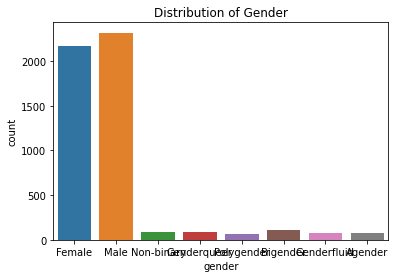

In [7]:
# See the distribution of gender to recognize different distributions
sns.countplot(data=df, x='gender')
plt.title('Distribution of Gender')

In [8]:
df.drop(df.loc[df['gender'] == 'Non-binary'].index, inplace=True)
df.drop(df.loc[df['gender'] == 'Agender'].index, inplace=True)
df.drop(df.loc[df['gender'] == 'Bigender'].index, inplace=True)
df.drop(df.loc[df['gender'] == 'Polygender'].index, inplace=True)
df.drop(df.loc[df['gender'] == 'Genderfluid'].index, inplace=True)
df.drop(df.loc[df['gender'] == 'Genderqueer'].index, inplace=True)
df.head()

,orderID,orderDate,clienteID,CEP,estado,bairro,cidade,rua,numero,endereco,gender,age,plataform,total,products,cupon,spendingScore
0,1,24/11/2022 19:03,b23d4264-b084-4b5f-b341-fb1775b0a2f9,81650130,PR,Boqueirão,Curitiba,Rua São Pedro,821,"Rua São Pedro, 821 - Boqueirão, Curitiba - PR,...",Female,23,app,134.56,9,None,0.149511
1,2,26/02/2022 11:57,eec8a486-7373-4d7d-a859-750455fd190c,80240150,PR,Água Verde,Curitiba,Travessa Lange,211,"Travessa Lange, 211 - Água Verde, Curitiba - P...",Female,35,android,1242.82,7,VERAOOFF15,1.775457
2,3,13/05/2022 10:40,33bde395-65fa-43aa-bb9b-90b8e9e4bbba,82220416,PR,Cachoeira,Curitiba,Rua Rolando Salin Zappa Mansur,549,"Rua Rolando Salin Zappa Mansur, 549 - Cachoeir...",Female,29,android,1118.59,6,FOX5POR3,1.864317
3,4,16/08/2022 12:17,9f95c07d-d9e3-45d4-835e-a0dbc87d22ac,82220360,PR,Cachoeira,Curitiba,Rua Maria Lenk,546,"Rua Maria Lenk, 546 - Cachoeira, Curitiba - PR...",Male,21,ios,1384.44,3,None,4.614800
4,5,07/10/2022 09:52,6095ef93-3172-4a95-838e-5fa7f2ddb108,80230972,PR,Rebouças,Curitiba,Rua João Negrão,353,"Rua João Negrão, 353 - Rebouças, Curitiba - PR...",Female,30,safari,357.60,10,None,0.357600


Text(0.5, 0, 'Age')

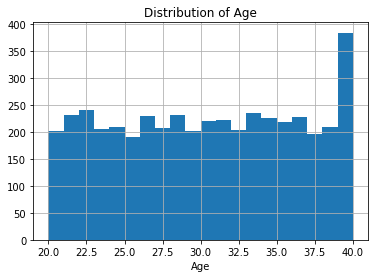

In [9]:
# Histogram of ages
df.hist('age', bins=20);
plt.title('Distribution of Age');
plt.xlabel('Age')

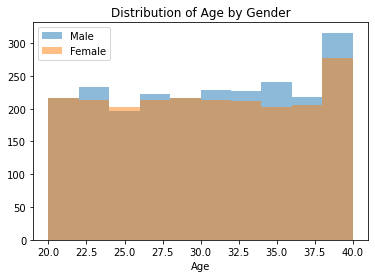

In [10]:
# Histogram of ages by gender
plt.hist('age', data=df[df['gender'] == 'Male'], alpha=0.5, label='Male')
plt.hist('age', data=df[df['gender'] == 'Female'], alpha=0.5, label='Female')
plt.title('Distribution of Age by Gender')
plt.xlabel('Age')
plt.legend()

Text(0.5, 0, 'Total Spend by Order (R$ BRL)')

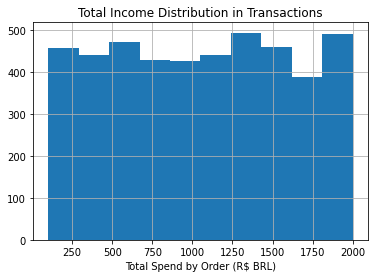

In [11]:
# Histogram of income
df.hist('total')
plt.title('Total Income Distribution in Transactions')
plt.xlabel('Total Spend by Order (R$ BRL)')

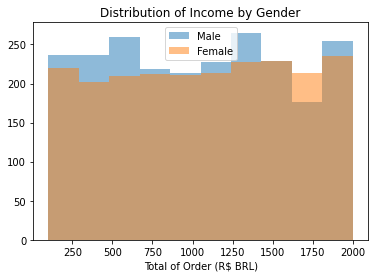

In [12]:
# Histogram of income by gender
plt.hist('total', data=df[df['gender'] == 'Male'], alpha=0.5, label='Male')
plt.hist('total', data=df[df['gender'] == 'Female'], alpha=0.5, label='Female')
plt.title('Distribution of Income by Gender')
plt.xlabel('Total of Order (R$ BRL)')
plt.legend()

In [13]:
# Create data sets by gender
male_customers = df[df['gender'] == 'Male']
female_customers = df[df['gender'] == 'Female']

In [14]:
# Print the average spending score for men and women
print(male_customers['spendingScore'].mean())
print(female_customers['spendingScore'].mean())

2.4052603335765324
2.4242299478995464


Text(0.5, 1.0, 'Age to Income, Colored by Gender')

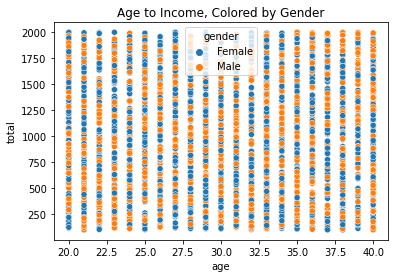

In [15]:
sns.scatterplot(x='age', y='total', hue='gender', data=df)
plt.title('Age to Income, Colored by Gender')

C:\Users\junio\AppData\Local\Temp\ipykernel_12184\361918742.py:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  sns.scatterplot(x='age', y='total', hue='gender', data=df.groupby(['age','gender']).sum())


Text(0.5, 1.0, 'Group By Age to Income, Colored by Gender')

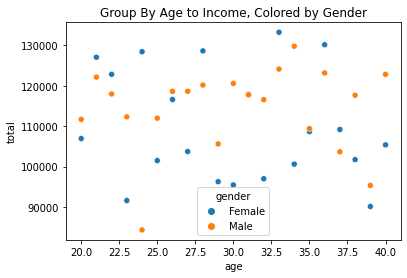

In [16]:
sns.scatterplot(x='age', y='total', hue='gender', data=df.groupby(['age','gender']).sum())
plt.title('Group By Age to Income, Colored by Gender')

Text(0.5, 1.0, 'Age to Spending Score, Colored by Gender')

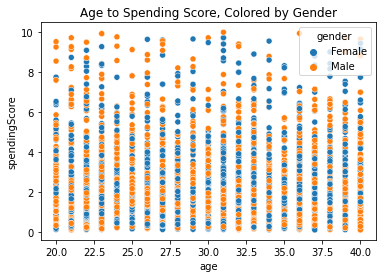

In [17]:
sns.scatterplot(data=df, x='age', y='spendingScore', hue='gender')
plt.title('Age to Spending Score, Colored by Gender')

C:\Users\junio\AppData\Local\Temp\ipykernel_12184\3097276355.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(female_customers.corr(), annot=True)


Text(0.5, 1.0, 'Correlation Heatmap - Female')

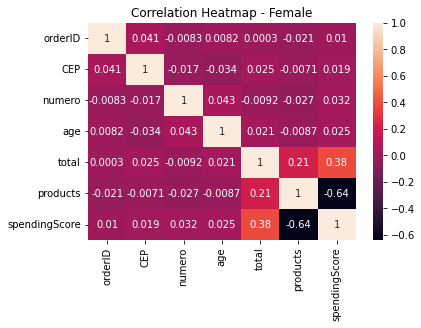

In [18]:
sns.heatmap(female_customers.corr(), annot=True)
plt.title('Correlation Heatmap - Female')

C:\Users\junio\AppData\Local\Temp\ipykernel_12184\76468339.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(male_customers.corr(), annot=True)


Text(0.5, 1.0, 'Correlation Heatmap - Male')

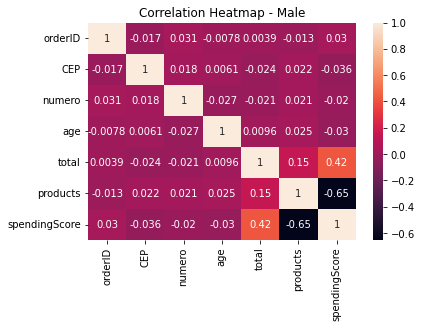

In [19]:
sns.heatmap(male_customers.corr(), annot=True)
plt.title('Correlation Heatmap - Male')

Text(0.5, 1.0, 'Age to Spending Score, Female Only')

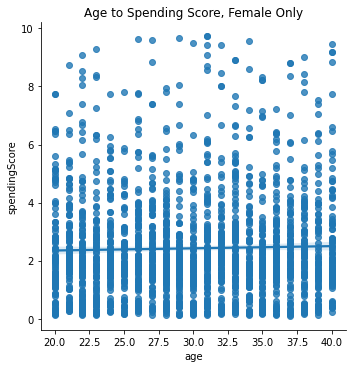

In [20]:
sns.lmplot(x='age', y='spendingScore', data=female_customers)
plt.title('Age to Spending Score, Female Only')

Text(0.5, 1.0, 'Age to Spending Score, Male Only')

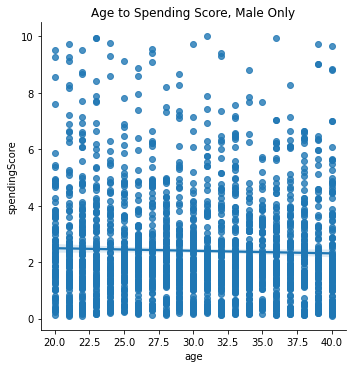

In [21]:
sns.lmplot(x='age', y='spendingScore', data=male_customers)
plt.title('Age to Spending Score, Male Only')

c:\Users\junio\.venv\fulldata310\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


Text(0.5, 1.0, 'Total Income to Spending Score, Colored by Gender')

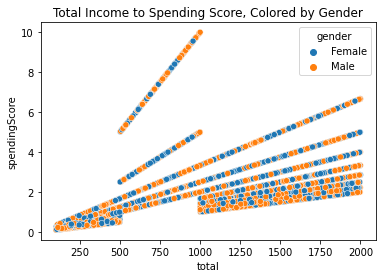

In [34]:
sns.scatterplot('total', 'spendingScore', hue='gender', data=df)
plt.title('Total Income to Spending Score, Colored by Gender')

Text(0.5, 1.0, 'Total to Spending Score, Female Only')

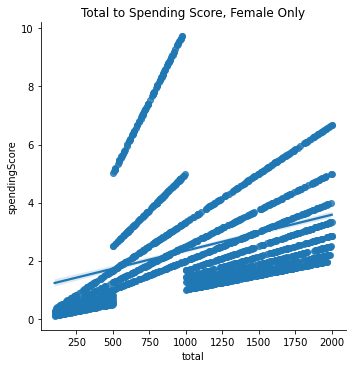

In [32]:
sns.lmplot(x='total', y='spendingScore', data=female_customers)
plt.title('Total to Spending Score, Female Only')

Text(0.5, 1.0, 'Total to Spending Score, Male Only')

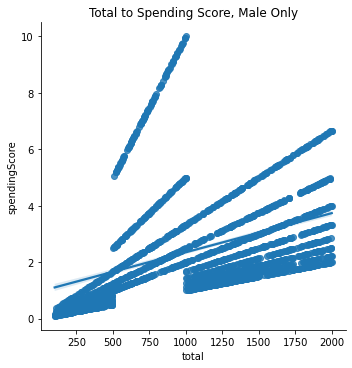

In [35]:
sns.lmplot(x='total', y='spendingScore', data=male_customers)
plt.title('Total to Spending Score, Male Only')

C:\Users\junio\AppData\Local\Temp\ipykernel_12184\3794058893.py:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  sns.scatterplot(x='total', y='spendingScore', hue='gender', data=df.groupby(['age','gender']).mean())


Text(0.5, 1.0, 'Mean of Income to Spending Score, Colored by Gender Group Age')

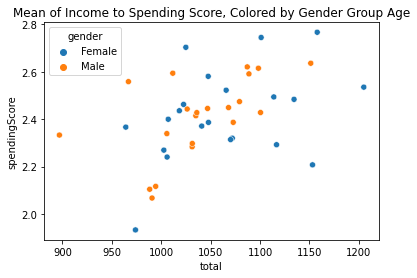

In [43]:
sns.scatterplot(x='total', y='spendingScore', hue='gender', data=df.groupby(['age','gender']).mean())
plt.title('Mean of Income to Spending Score, Colored by Gender Group Age')